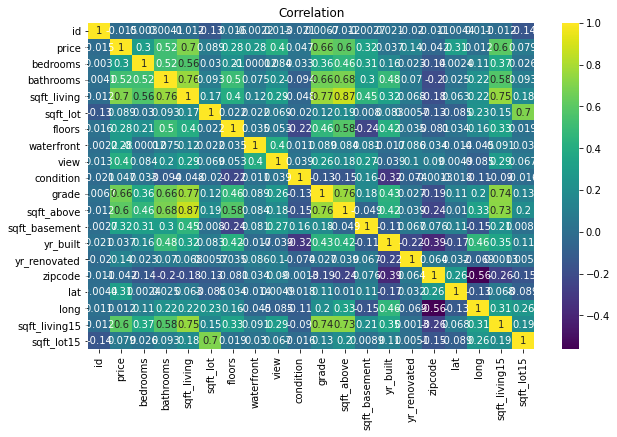

               id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
...           ...              ...        ...       ...        ...   
17994  6414100026  20150108T000000   320000.0         2       1.00   
17995  1346300035  20140626T000000  1990000.0         5       3.00   
17996  2212210360  20140702T000000   253000.0         2       1.00   
17997   205000410  20140915T000000   630000.0         3       2.50   
17998  2892600056  20150106T000000   216000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570 

In [193]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
data=pd.read_csv("C:\\Users\\lenovo\\Desktop\\New folder\\house_prices_data_training_data.csv")


pyplot.figure(figsize=(10,6))
pyplot.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
pyplot.show()
print(data)

In [194]:
columns =data.columns[3:]
norm_data = (data[columns]-(data[columns]).mean())/(data[columns]).std()
print(norm_data)
data[columns] = norm_data

       bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.388600  -1.399361    -0.965747 -0.238104 -0.849901   -0.088855   
1     -0.388600   0.248341     0.574003 -0.200605  1.112180   -0.088855   
2     -1.459226  -1.399361    -1.419918 -0.135643 -0.849901   -0.088855   
3      0.682027   1.236962    -0.101715 -0.253414 -0.849901   -0.088855   
4     -0.388600  -0.081200    -0.411880 -0.180867 -0.849901   -0.088855   
...         ...        ...          ...       ...       ...         ...   
17994 -1.459226  -1.399361    -0.276737 -0.106789 -0.849901   -0.088855   
17995  1.752654   1.236962     2.689774 -0.253414  2.093221   -0.088855   
17996 -1.459226  -1.399361    -0.821741 -0.203291 -0.849901   -0.088855   
17997 -0.388600   0.577881     0.297069  0.400735  1.112180   -0.088855   
17998 -1.459226  -1.399361    -1.021134 -0.076757 -0.849901   -0.088855   

         view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.3113  -0.672411

In [195]:
train, validate , test = np.split(data.sample(frac=1),[int(.6*len(data)),int(.8*len(data))]) #splitting
train=train.to_numpy() #change the training set to an array
validate=validate.to_numpy() #change the training set to an array
test=test.to_numpy() #change the training set to an array
print(train)
print(validate)
print(test)

[[2954400520 '20150430T000000' 1240000.0 ... 1.0501402025587723
  3.36721253087269 0.8072679963791654]
 [8965400210 '20140701T000000' 820000.0 ... 0.6907777435058352
  1.4063899738309136 -0.08014907408777179]
 [1003400250 '20140605T000000' 237000.0 ... -0.5094928697310545
  -0.9703646407651791 -0.09623540503184348]
 ...
 [2525049148 '20141007T000000' 3420000.0 ... -0.15731765985921084
  1.7629031660203274 0.1660814688856893]
 [3601200465 '20150123T000000' 340000.0 ... -0.6101143582658524
  0.7676371711582136 -0.2223668635705875]
 [4359700080 '20140721T000000' 560000.0 ... 0.41047502544461983
  0.4853975606749276 0.10180926479551194]]
[[5469502660 '20140929T000000' 439950.0 ... 0.3961005270824329
  0.7230730221345368 0.04817597503425471]
 [8857600780 '20141003T000000' 158550.0 ... -0.5238673680931393
  -0.7326891793055699 -0.19220499305045305]
 [8732030440 '20140813T000000' 305000.0 ... -1.2138432894748439
  0.3517051136038974 -0.18141983934931408]
 ...
 [4338800500 '20141014T000000' 26

In [196]:
train_y =train[:,2]
train_y
train_m=train_y.size

In [210]:
train_x = train[:,[3,4,5,9,11,12,19]] #these columns according to heatmap and the correlation function
train_x = np.concatenate([np.ones((train_m,1)), train_x], axis =1)

#train_x2=np.power(train_x, 2)   #make an array power 2
#train_x3=np.power(train_x, 3)   #make an array power 3
#train_x4=np.power(train_x, 4)   #make an array power 4
#train_x5=np.power(train_x, 5)   #make an array power 5
#train_x6=np.power(train_x, 6)   #make an array power 6
#train_x7=np.power(train_x, 7)   #make an array power 7
#train_x8=np.power(train_x, 8)   #make an array power 8

print(train_x)

[[1.0 0.6820270890685737 1.5665024158728333 ... 2.058695523163801
  4.258928662871855 3.36721253087269]
 [1.0 -0.38859959644906616 0.24834079907549203 ... 2.058695523163801
  1.403301816261238 1.4063899738309136]
 [1.0 -0.38859959644906616 -1.3993612219211846 ... -0.5065146340826687
  -0.7694577409424922 -0.9703646407651791]
 ...
 [1.0 1.7526537745862136 3.8732852452681805 ... 2.9137655755792906
  4.594154423126144 1.7629031660203274]
 [1.0 0.6820270890685737 0.9074216074741627 ... -0.5065146340826687
  2.2066020639817028 0.7676371711582136]
 [1.0 -0.38859959644906616 -0.08119960512384329 ... -0.5065146340826687
  0.11206185083730692 0.4853975606749276]]


In [211]:
def computeCostMulti(X, y, theta):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J

In [212]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

29390932643.691406
[533766.1818723623 -28945.20570668056 -8357.532846767575
 166893.83933925987 75913.72945651266 99039.6833751321 -654.0370258765879
 17811.06655613006]


Text(0, 0.5, 'Cost J')

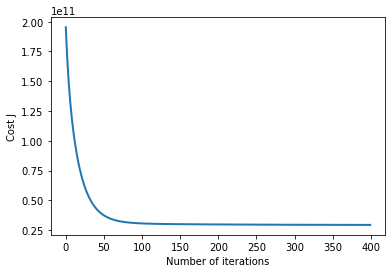

In [242]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(train_x[:,0:8], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


29406543979.985126
[533892.239596844 -29388.14868674567 -10203.646572291742
 173546.59976761864 77339.45828906784 105617.89200364027
 3011.8156417412324]


Text(0, 0.5, 'Cost J')

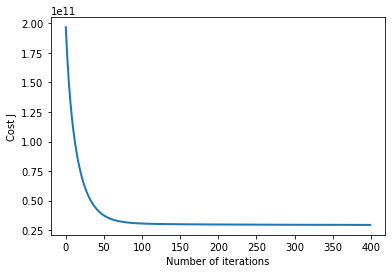

In [243]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(train_x[:,0:7], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

29363519704.681602
[533881.426859098 -31410.37415529894 -13017.28363135401 182346.0968038944
 75800.46307535924 105083.99669315823]


Text(0, 0.5, 'Cost J')

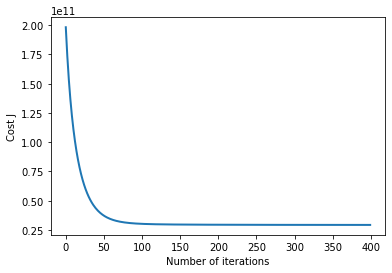

In [253]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(train_x[:,0:6], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

31263092727.004578
[533829.9690710657 -47433.51927642213 11538.97536080781 252466.60686596483
 78856.36997446234]


Text(0, 0.5, 'Cost J')

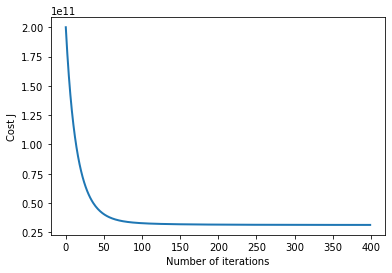

In [245]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(train_x[:,0:5], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

33935723396.47732
[533665.5092248633 -57492.99046947192 10128.296650586359
 282756.49899732467]


Text(0, 0.5, 'Cost J')

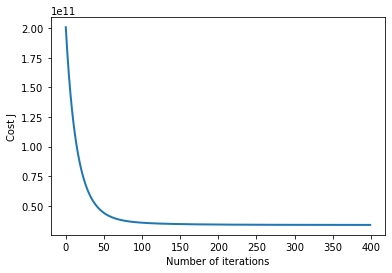

In [246]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(4)
theta, J_history = gradientDescentMulti(train_x[:,0:4], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

50233809009.94005
[534452.868178837 13724.452622159113 185920.78551139598]


Text(0, 0.5, 'Cost J')

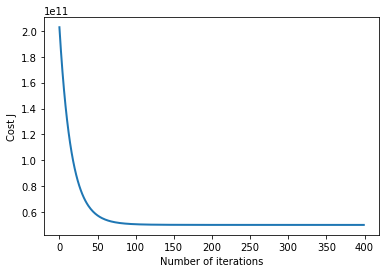

In [247]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(train_x[:,0:3], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

62633073956.27374
[534379.3105908894 116204.85752492983]


Text(0, 0.5, 'Cost J')

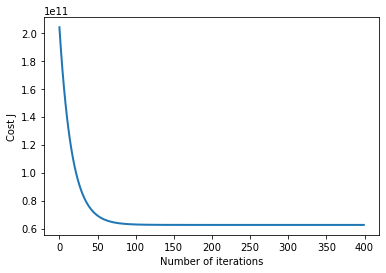

In [248]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(2)
theta, J_history = gradientDescentMulti(train_x[:,0:2], train_y, theta, alpha, num_iters)

print(J_history[-1])
print(theta)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [225]:
validate_x = validate[:,[3,4,5,9,11,12,19]]
validate_x

array([[0.6820270890685737, 0.24834079907549203, 0.45215211264338284,
        ..., 0.34855541833282117, -0.03692737594237743,
        0.7230730221345368],
       [1.7526537745862136, -0.740280413522514, -0.37864806084751423,
        ..., -0.5065146340826687, -0.049343144840684465,
        -0.7326891793055699],
       [0.6820270890685737, 0.5778812032748274, 0.5075387908761093, ...,
        0.34855541833282117, -0.285242753908518, 0.3517051136038974],
       ...,
       [-0.38859959644906616, -0.08119960512384329, -1.0211335283471412,
        ..., -1.3615846864981584, -0.7694577409424922,
        -1.044638222471307],
       [-0.38859959644906616, -0.4107400093231786, -0.15710134791660835,
        ..., -0.5065146340826687, -0.8315365854340273,
        -0.33161183809247924],
       [-1.4592262819667061, -1.3993612219211846, -0.9546695144678695,
        ..., -0.5065146340826687, -0.69496312755265, -0.7475438956467955]],
      dtype=object)

In [226]:
validate_y =validate[:,2]
validate_y

array([439950.0, 158550.0, 305000.0, ..., 262500.0, 700000.0, 295950.0],
      dtype=object)

In [227]:
validate_m =validate_y.size
validate_m

3600

In [228]:
validate_x = np.concatenate([np.ones((validate_m,1)), validate_x], axis =1)
validate_x

array([[1.0, 0.6820270890685737, 0.24834079907549203, ...,
        0.34855541833282117, -0.03692737594237743, 0.7230730221345368],
       [1.0, 1.7526537745862136, -0.740280413522514, ...,
        -0.5065146340826687, -0.049343144840684465, -0.7326891793055699],
       [1.0, 0.6820270890685737, 0.5778812032748274, ...,
        0.34855541833282117, -0.285242753908518, 0.3517051136038974],
       ...,
       [1.0, -0.38859959644906616, -0.08119960512384329, ...,
        -1.3615846864981584, -0.7694577409424922, -1.044638222471307],
       [1.0, -0.38859959644906616, -0.4107400093231786, ...,
        -0.5065146340826687, -0.8315365854340273, -0.33161183809247924],
       [1.0, -1.4592262819667061, -1.3993612219211846, ...,
        -0.5065146340826687, -0.69496312755265, -0.7475438956467955]],
      dtype=object)

In [249]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533766.1818723623,-28945.20570668056,-8357.532846767575,
                  166893.83933925987,75913.72945651266,99039.6833751321,-654.0370258765879,17811.06655613006])
J_history =  computeCostMulti(validate_x[:,0:8], validate_y, theta)

print(J_history)

28078005868.688736


In [251]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533892.239596844,-29388.14868674567,-10203.646572291742,173546.59976761864,77339.45828906784,105617.89200364027
                  ,3011.8156417412324])
J_history =  computeCostMulti(validate_x[:,0:7], validate_y, theta)

print(J_history)

28062704007.7124


In [255]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533881.426859098,-31410.37415529894,-13017.28363135401,182346.0968038944,75800.46307535924,105083.99669315823])
J_history =  computeCostMulti(validate_x[:,0:6], validate_y, theta)

print(J_history)

28016231504.994938


In [256]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533829.9690710657,-47433.51927642213,11538.97536080781,252466.60686596483,78856.36997446234])
J_history =  computeCostMulti(validate_x[:,0:5], validate_y, theta)

print(J_history)

30461257482.366245


In [257]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533665.5092248633,-57492.99046947192,10128.296650586359,282756.49899732467])
J_history =  computeCostMulti(validate_x[:,0:4], validate_y, theta)

print(J_history)

31946345475.18152


In [258]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([534452.868178837,13724.452622159113,185920.78551139598])
J_history =  computeCostMulti(validate_x[:,0:3], validate_y, theta)

print(J_history)

46823057794.19996


In [259]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([534379.3105908894,116204.85752492983])
J_history =  computeCostMulti(validate_x[:,0:2], validate_y, theta)

print(J_history)

57793726338.6306


In [260]:
test_x = test[:,[3,4,5,9,11,12,19]]
test_x

array([[-0.38859959644906616, 0.5778812032748274, -0.7663548084765995,
        ..., -0.5065146340826687, -0.4838950562814305,
        -1.3120231166133676],
       [-1.4592262819667061, -1.3993612219211846, -1.5860776463209514,
        ..., -1.3615846864981584, -1.4026619547561507,
        -1.014928789788856],
       [0.6820270890685737, 1.5665024158728333, 0.8952455385051946, ...,
        1.203625470748311, 0.2858826154136053, 0.0546107867793858],
       ...,
       [0.6820270890685737, 0.5778812032748274, 2.2909898299699014, ...,
        0.34855541833282117, 0.3976245354983686, 2.4462201177167042],
       [-1.4592262819667061, -1.3993612219211846, -1.5196136324416796,
        ..., -1.3615846864981584, -1.3281673413663084,
        -0.5395778668696374],
       [0.6820270890685737, 0.24834079907549203, 0.5075387908761093, ...,
        1.203625470748311, 0.55902953117636, 1.6886295843141996]],
      dtype=object)

In [261]:
test_y =test[:,2]
test_y

array([419500.0, 402000.0, 825050.0, ..., 1850000.0, 365000.0, 800000.0],
      dtype=object)

In [262]:
test_m =test_y.size
test_m

3600

In [263]:
test_x = np.concatenate([np.ones((test_m,1)), test_x], axis =1)
test_x

array([[1.0, -0.38859959644906616, 0.5778812032748274, ...,
        -0.5065146340826687, -0.4838950562814305, -1.3120231166133676],
       [1.0, -1.4592262819667061, -1.3993612219211846, ...,
        -1.3615846864981584, -1.4026619547561507, -1.014928789788856],
       [1.0, 0.6820270890685737, 1.5665024158728333, ...,
        1.203625470748311, 0.2858826154136053, 0.0546107867793858],
       ...,
       [1.0, 0.6820270890685737, 0.5778812032748274, ...,
        0.34855541833282117, 0.3976245354983686, 2.4462201177167042],
       [1.0, -1.4592262819667061, -1.3993612219211846, ...,
        -1.3615846864981584, -1.3281673413663084, -0.5395778668696374],
       [1.0, 0.6820270890685737, 0.24834079907549203, ...,
        1.203625470748311, 0.55902953117636, 1.6886295843141996]],
      dtype=object)

In [264]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.array([533766.1818723623,-28945.20570668056,-8357.532846767575,
                  166893.83933925987,75913.72945651266,99039.6833751321,-654.0370258765879,17811.06655613006])
J_history =  computeCostMulti(test_x[:,0:8], test_y, theta)

print(J_history)

25596092582.814125
